In [1]:
# 引進相關套件
import requests
from io import StringIO
import pandas as pd
import numpy as np
import sys

# 網址
url= 'http://www.olo.com.tw/histNo/mainT539.php?cp=0'

# 送出要求，並取得回應資料
response = requests.post(url)
response.status_code

200

In [2]:
print(response.text)

<html>
<title>¥xÆW539 ¾ú¥v¸¹½X¡ã¡ã</title>
<body>

		<table border bgcolor="#ddddff" width=430>
			<tr align=center>
				<td colspan=9 bgcolor="#FF71FF">
			¥xÆW539 ¾ú¥v¸¹½X 113¦~«×  ´Á§O 1 ¦Ü 189   </td>
			</tr>

			<tr align=center>
           			<td width=80>´Á§O</td>
			        <td width=50>¤@</td>
				<td width=50>¤G</td>
				<td width=50>¤T</td>
                                <td width=50>¥|</td> 
				<td width=50>¤­</td>
				<td width=100>¤é´Á</td>
			</tr>

             <tr align=center>
			<td>1</td>
			<td>30</td>
			<td>3</td>
			<td>9</td>
                        <td>27</td>
			<td>33</td>
			<td>2024-01-01</td>
		</tr>
             <tr align=center>
			<td>2</td>
			<td>25</td>
			<td>22</td>
			<td>21</td>
                        <td>37</td>
			<td>30</td>
			<td>2024-01-02</td>
		</tr>
             <tr align=center>
			<td>3</td>
			<td>1</td>
			<td>21</td>
			<td>37</td>
                        <td>32</td>
			<td>5</td>
			<td>2024-1-3</td>
		</tr>
             <tr a

In [3]:
!pip install beautifulsoup4


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text)

data = []
table = soup.find('table')

rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values
    
data    

[['¥xÆW539 ¾ú¥v¸¹½X 113¦~«×  ´Á§O 1 ¦Ü 189'],
 ['´Á§O', '¤@', '¤G', '¤T', '¥|', '¤\xad', '¤é´Á'],
 ['1', '30', '3', '9', '27', '33', '2024-01-01'],
 ['2', '25', '22', '21', '37', '30', '2024-01-02'],
 ['3', '1', '21', '37', '32', '5', '2024-1-3'],
 ['4', '11', '29', '27', '28', '37', '2024-1-4'],
 ['5', '14', '33', '21', '11', '10', '2024-1-5'],
 ['6', '1', '39', '37', '16', '33', '2024-1-6'],
 ['7', '39', '7', '22', '38', '35', '2024-1-8'],
 ['8', '17', '27', '23', '19', '9', '2024-1-9'],
 ['9', '3', '6', '24', '15', '19', '2024-1-10'],
 ['10', '23', '15', '36', '34', '37', '2024-1-11'],
 ['11', '12', '1', '31', '3', '23', '2024-1-12'],
 ['12', '33', '14', '27', '20', '38', '2024-1-13'],
 ['13', '3', '11', '10', '1', '35', '2024-1-15'],
 ['14', '27', '29', '9', '5', '2', '2024-1-16'],
 ['15', '39', '32', '38', '17', '10', '2024-1-17'],
 ['16', '31', '27', '32', '33', '10', '2024-1-18'],
 ['17', '35', '13', '17', '2', '3', '2024-1-19'],
 ['18', '36', '28', '15', '20', '37', '2024-1-20'

In [5]:
data = data[2:-1]
data

[['1', '30', '3', '9', '27', '33', '2024-01-01'],
 ['2', '25', '22', '21', '37', '30', '2024-01-02'],
 ['3', '1', '21', '37', '32', '5', '2024-1-3'],
 ['4', '11', '29', '27', '28', '37', '2024-1-4'],
 ['5', '14', '33', '21', '11', '10', '2024-1-5'],
 ['6', '1', '39', '37', '16', '33', '2024-1-6'],
 ['7', '39', '7', '22', '38', '35', '2024-1-8'],
 ['8', '17', '27', '23', '19', '9', '2024-1-9'],
 ['9', '3', '6', '24', '15', '19', '2024-1-10'],
 ['10', '23', '15', '36', '34', '37', '2024-1-11'],
 ['11', '12', '1', '31', '3', '23', '2024-1-12'],
 ['12', '33', '14', '27', '20', '38', '2024-1-13'],
 ['13', '3', '11', '10', '1', '35', '2024-1-15'],
 ['14', '27', '29', '9', '5', '2', '2024-1-16'],
 ['15', '39', '32', '38', '17', '10', '2024-1-17'],
 ['16', '31', '27', '32', '33', '10', '2024-1-18'],
 ['17', '35', '13', '17', '2', '3', '2024-1-19'],
 ['18', '36', '28', '15', '20', '37', '2024-1-20'],
 ['19', '3', '17', '25', '15', '36', '2024-1-22'],
 ['20', '8', '19', '35', '18', '16', '2024-1

In [6]:
columns = ['期別', 'n1', 'n2', 'n3', 'n4', 'n5', 'date1']
df = pd.DataFrame(data, columns=columns)
df = df.dropna()
for i in range(1, 6):
    df['n'+str(i)] = df['n'+str(i)].astype(int)
df

,期別,n1,n2,n3,n4,n5,date1
0,1,30,3,9,27,33,2024-01-01
1,2,25,22,21,37,30,2024-01-02
2,3,1,21,37,32,5,2024-1-3
3,4,11,29,27,28,37,2024-1-4
4,5,14,33,21,11,10,2024-1-5
...,...,...,...,...,...,...,...
184,185,24,22,38,1,19,2024-8-2
185,186,27,26,11,12,32,2024-8-3
186,187,36,6,17,11,7,2024-8-5
187,188,29,37,6,1,12,2024-8-6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   期別      197 non-null    object
 1   n1      197 non-null    int32 
 2   n2      197 non-null    int32 
 3   n3      197 non-null    int32 
 4   n4      197 non-null    int32 
 5   n5      197 non-null    int32 
 6   date1   197 non-null    object
dtypes: int32(5), object(2)
memory usage: 7.1+ KB


In [24]:
df.to_csv('539歷史資料.csv', index=False)

In [7]:
list1 = list(df.n1.values) + list(df.n2.values) + list(df.n3.values) + list(df.n4.values) + list(df.n5.values)
len(list1)

945

In [8]:
arr = np.array(list1)
arr

array([30, 25,  1, 11, 14,  1, 39, 17,  3, 23, 12, 33,  3, 27, 39, 31, 35,
       36,  3,  8, 33, 34, 12,  8,  1, 21, 10, 29, 33, 23, 15, 32, 28, 38,
       20, 21, 38, 24, 27, 15, 11, 12, 24, 34, 35, 15,  3,  2, 29, 30, 28,
       26, 36, 29,  5, 26, 38, 20, 15,  5,  2, 12,  8, 19,  8, 16, 18, 39,
       29, 13,  7,  7, 20,  7, 21, 29, 12, 12, 20, 26,  3, 35, 35, 22,  3,
       12, 21, 15,  1, 19,  9, 28, 28,  6, 38, 34,  6, 18, 17, 25, 31, 36,
       27,  7, 32, 35, 37,  7, 39, 25, 16, 11, 38,  7, 36,  7, 33, 21, 27,
       37, 32, 16, 29, 23, 39, 34, 24, 36,  9, 37, 12, 20, 10, 17,  4,  3,
       35, 11, 38, 13, 14, 17, 20,  5,  8,  2, 11, 20, 15, 22, 32, 37, 38,
       18, 25, 35, 11, 16,  4, 12, 24,  4, 17, 13,  9,  2, 18, 21, 37,  7,
       37,  5, 24, 11, 26, 12,  2,  1, 36, 15, 30, 29, 36, 24, 24, 27, 36,
       29, 16,  3, 22, 21, 29, 33, 39,  7, 27,  6, 15,  1, 14, 11, 29, 32,
       27, 13, 28, 17, 19,  4, 32, 31,  9, 22, 36, 32, 19, 26, 21, 16,  6,
       11, 35, 22, 22,  8

In [9]:
import pandas as pd
import seaborn as sns

df2 = pd.DataFrame({'arr':arr})
df2.head()

,arr
0,30
1,25
2,1
3,11
4,14


In [10]:
df2.arr.value_counts()

arr
36    36
12    33
1     33
37    32
3     31
11    30
38    29
15    27
35    27
21    27
17    27
27    26
10    25
23    25
20    25
2     24
22    24
16    24
26    23
32    23
6     23
34    23
31    23
33    23
9     22
28    22
18    22
24    22
14    22
19    22
30    21
29    21
39    21
13    19
7     19
5     19
4     19
25    17
8     14
Name: count, dtype: int64

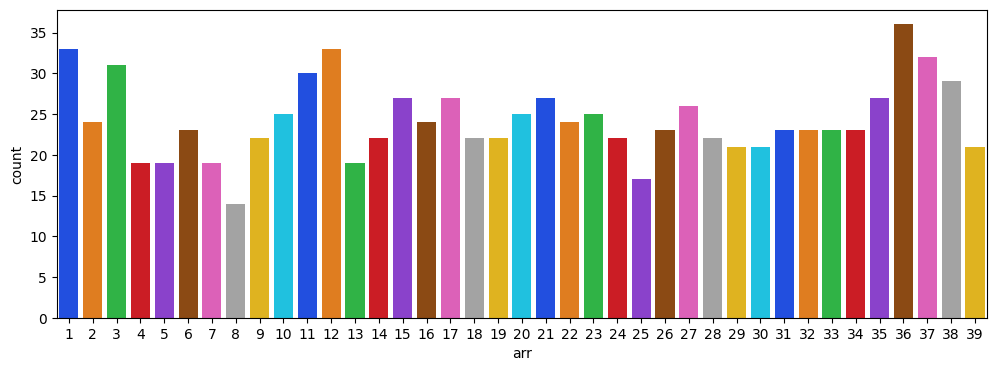

In [17]:
# palette：https://seaborn.pydata.org/tutorial/color_palettes.html
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.countplot(x='arr', data=df2, hue='arr', palette='bright')
plt.legend('',frameon=False)
plt.show()